# Airbnb analysis for Boston and Seattle 

# Objective of this project
Qustion To be Answered
  1. How the seasonality affects the pricing of Airbnb?
  2. What are the Key difference between Boston and Seattle Airbnb markets?
  3. What is the best price predictor for Boston and Seattle?
  

# Data Understanding


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


In [2]:
boston_df_listing = pd.read_csv('boston_listings.csv')

In [3]:
boston_df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
seattle_df_listing = pd.read_csv('seattle_listings.csv')

In [6]:
seattle_df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# We need to reduce the dimenstion as per our requirments related to location and Airbnb price only.



In [7]:
boston_df_market = pd.read_csv('boston_listings.csv',usecols = ['market','neighbourhood_cleansed','property_type', 'price', 'cleaning_fee'])

In [8]:
boston_df_market.head()

,neighbourhood_cleansed,market,property_type,price,cleaning_fee
0,Roslindale,Boston,House,$250.00,$35.00
1,Roslindale,Boston,Apartment,$65.00,$10.00
2,Roslindale,Boston,Apartment,$65.00,NaN
3,Roslindale,Boston,House,$75.00,$50.00
4,Roslindale,Boston,House,$79.00,$15.00


In [9]:
boston_df_market.shape

(3585, 5)

In [10]:
seattle_df_market = pd.read_csv('seattle_listings.csv'
                               ,usecols = ['market','neighbourhood_cleansed','property_type', 'price', 'cleaning_fee']) # reading in necessary columns only
seattle_df_market.head()

,neighbourhood_cleansed,market,property_type,price,cleaning_fee
0,West Queen Anne,Seattle,Apartment,$85.00,NaN
1,West Queen Anne,Seattle,Apartment,$150.00,$40.00
2,West Queen Anne,Seattle,House,$975.00,$300.00
3,West Queen Anne,Seattle,Apartment,$100.00,NaN
4,West Queen Anne,Seattle,House,$450.00,$125.00


In [11]:
seattle_df_market.shape

(3818, 5)

# Now combining both boston and seattle dataframes

In [12]:
airbnb_df_market = pd.concat([boston_df_market, seattle_df_market], axis = 'rows', ignore_index=True)
airbnb_df_market.head()

,neighbourhood_cleansed,market,property_type,price,cleaning_fee
0,Roslindale,Boston,House,$250.00,$35.00
1,Roslindale,Boston,Apartment,$65.00,$10.00
2,Roslindale,Boston,Apartment,$65.00,NaN
3,Roslindale,Boston,House,$75.00,$50.00
4,Roslindale,Boston,House,$79.00,$15.00


In [13]:
airbnb_df_market.tail()

,neighbourhood_cleansed,market,property_type,price,cleaning_fee
7398,Fremont,Seattle,House,$359.00,$230.00
7399,Portage Bay,Seattle,Apartment,$79.00,$50.00
7400,Rainier Beach,Seattle,House,$93.00,$35.00
7401,Madison Park,Seattle,Condominium,$99.00,$45.00
7402,East Queen Anne,Seattle,Apartment,$87.00,NaN


In [14]:
airbnb_df_market.shape

(7403, 5)

# Quality Of Data
 Observations

    1.  Market and property_type columns contain very litle ammount of missing informations
    2.  There are missing values in cleaning_fee column
    3. Market column contains some values different than Boston and Seattle
    4.  Price and cleaning_fee columns are object type and contain dollar sign                   
    
Decisions on current observations

     1. Dropping rows where market or property_type is NaN
     2. Imputing 0 in rows with missing cleaning fee. We are assuming there are no cleaning fees.
     3. Dropping rows with markets different than Boston or Seattle
     4. Cleaning up price and cleaning_fee columns and summing them up to get real AirBnB price

In [15]:
#checking the missing values
airbnb_df_market.isna().sum().sort_values(ascending = False)


cleaning_fee              2137
market                      14
property_type                4
price                        0
neighbourhood_cleansed       0
dtype: int64

In [17]:
#Now dropping the rows that contain missing values
airbnb_df_market.dropna(subset = (['market','property_type']) # subseting on market and property type columns
                       ,how = 'any' # if any column has NaN drop entire row
                       ,inplace = True)
airbnb_df_market.shape

(7385, 5)

In [18]:
# checking data types
airbnb_df_market.dtypes

neighbourhood_cleansed    object
market                    object
property_type             object
price                     object
cleaning_fee              object
dtype: object

In [19]:
#now feeing nan cleaning fees with 0.0
airbnb_df_market['cleaning_fee'].fillna(value = '0.0'
                                       ,inplace = True)
airbnb_df_market.isna().sum().sort_values(ascending = False)

cleaning_fee              0
price                     0
property_type             0
market                    0
neighbourhood_cleansed    0
dtype: int64

In [20]:
#checking market type

airbnb_df_market['market'].value_counts()

Seattle                  3817
Boston                   3565
Other (Domestic)            1
San Francisco               1
Other (International)       1
Name: market, dtype: int64

In [21]:
# dropping all rows with markets different than boston or seattle
airbnb_df_market.drop(airbnb_df_market[~airbnb_df_market['market'].isin(['Seattle','Boston'])].index
                     ,inplace = True)
airbnb_df_market['market'].unique()

array(['Boston', 'Seattle'], dtype=object)

In [22]:
# for  getting rid of $ sign, we will convert convert price and cleaning_fee to float type
airbnb_df_market['price'] = airbnb_df_market['price'].str.replace('[$,]','').astype(float)
airbnb_df_market['cleaning_fee'] = airbnb_df_market['cleaning_fee'].str.replace('[$,]','').astype(float)
airbnb_df_market.loc[:,['price','cleaning_fee']].head()

,price,cleaning_fee
0,250.0,35.0
1,65.0,10.0
2,65.0,0.0
3,75.0,50.0
4,79.0,15.0


In [23]:
airbnb_df_market['total_price'] = (airbnb_df_market['price']+airbnb_df_market['cleaning_fee']).astype('float')
airbnb_df_market.head()
# adding both the columns to get the total airbnb price

,neighbourhood_cleansed,market,property_type,price,cleaning_fee,total_price
0,Roslindale,Boston,House,250.0,35.0,285.0
1,Roslindale,Boston,Apartment,65.0,10.0,75.0
2,Roslindale,Boston,Apartment,65.0,0.0,65.0
3,Roslindale,Boston,House,75.0,50.0,125.0
4,Roslindale,Boston,House,79.0,15.0,94.0


In [24]:
airbnb_df_market.dtypes

neighbourhood_cleansed     object
market                     object
property_type              object
price                     float64
cleaning_fee              float64
total_price               float64
dtype: object

# Descriptive Statisics of the Market
OBSERVATION
  1. On average boston AirBnb properties are more expensive as compare to Seattle
  2. But the Seattle has larger volume

In [25]:
# checking market size, mean, median, min, max and standard deviation of the price
airbnb_df_market.groupby(['market'])['total_price'].agg(['count', 'mean', 'median', 'min', 'max','std'])

,count,mean,median,min,max,std
market,,,,,,
Boston,3565,221.161290,189.0,10.0,4000.0,172.141682
Seattle,3817,173.033272,140.0,20.0,1275.0,125.832139


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B04CE00E48>,
      dtype=object)

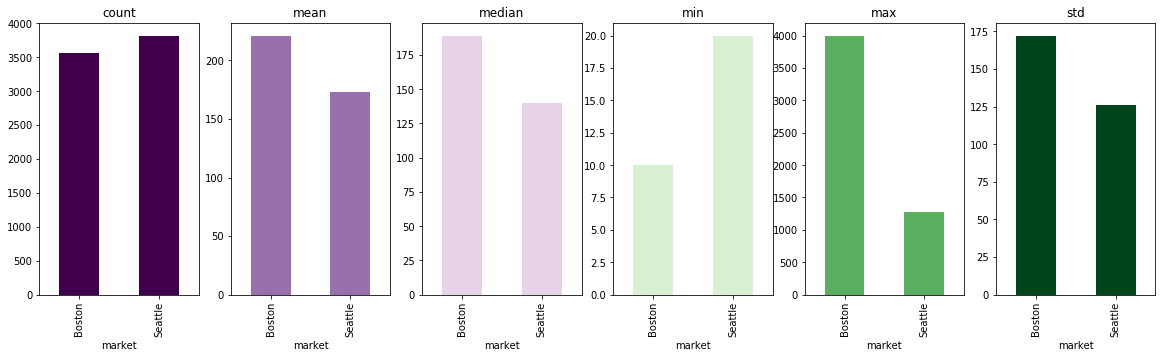

In [42]:
# plotting the statistic
airbnb_df_market.groupby(['market'])['total_price'].agg(['count','mean','median','min','max','std']).plot(kind = 'bar'
                                                                                                         ,subplots = True
                                                                                                         ,layout = (1,6)
                                                                                                         ,figsize = (20,5)
                                                                                                         ,legend = False
                                                                                                         ,colormap = 'PRGn')

# Types of Properties In boston and seattle
Observation
   1. Boston is mainly consist of apartment type properties,But on the other hand Seattle has two main property type Houses and Apartment
   2. Seattle doesn't have any villas

In [43]:
# creating pivot table of property types available in each market and their availability volume
airbnb_df_market.pivot_table(index = 'property_type'
                            ,columns = 'market'
                            ,values = 'total_price'
                            ,aggfunc = 'count').sort_values(by = 'Boston'
                                                           ,ascending =False)

market,Boston,Seattle
property_type,,
Apartment,2600.0,1708.0
House,559.0,1733.0
Condominium,229.0,91.0
Townhouse,54.0,118.0
Bed & Breakfast,41.0,37.0
Loft,39.0,40.0
Other,17.0,22.0
Boat,12.0,8.0
Villa,6.0,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B052F03248>,
      dtype=object)

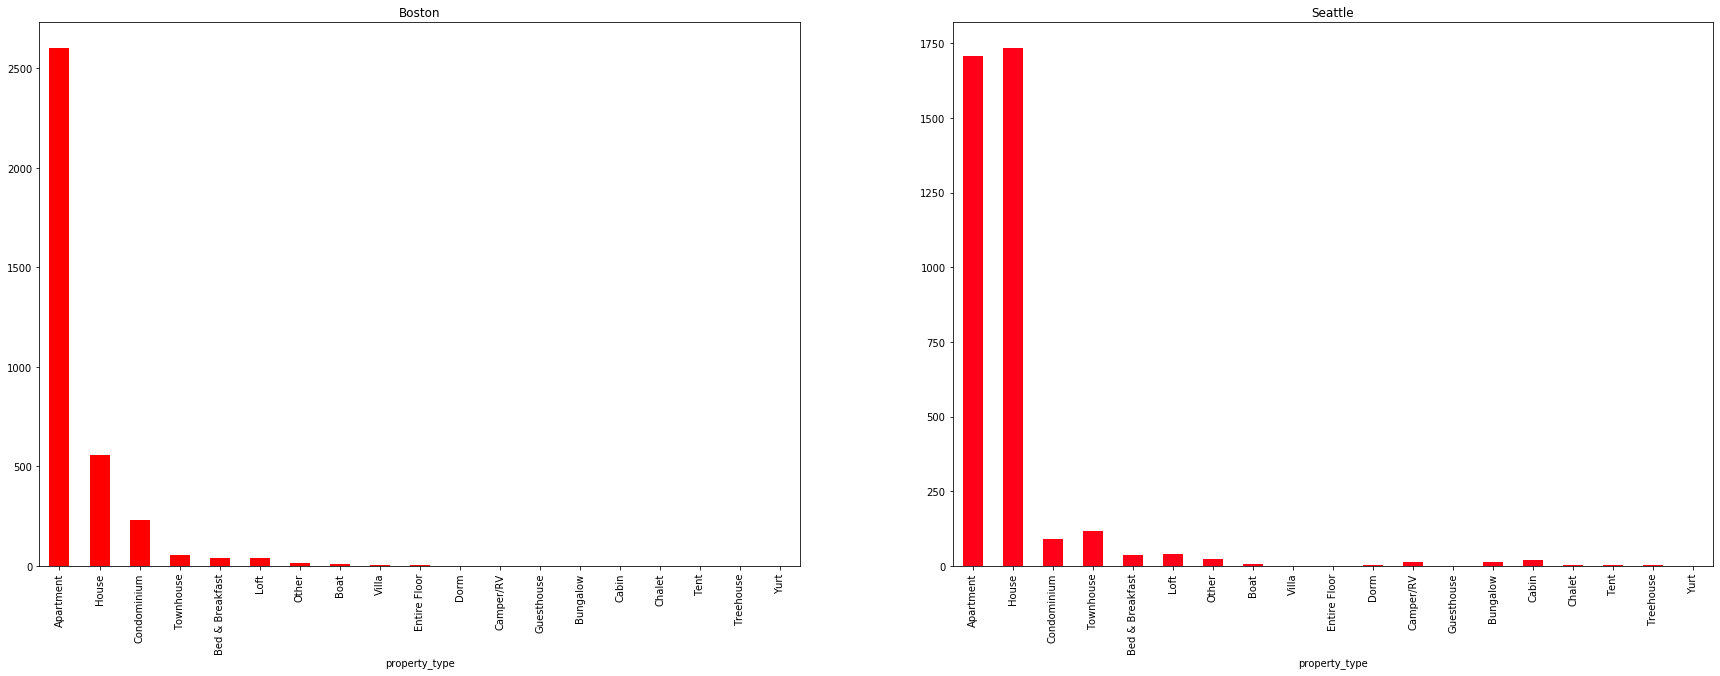

In [66]:
# plotting the property type volume by market
airbnb_df_market.pivot_table(index = 'property_type'
                            ,columns = 'market'
                            ,values = 'total_price'
                            ,aggfunc = 'count').sort_values(by = 'Boston'
                                                           ,ascending = False).plot(kind = 'bar'
                                                                                   ,subplots = True
                                                                                   ,layout = (1,2)
                                                                                   ,figsize = (30,10)                                                                                        
                                                                                   ,legend = False
                                                                                   ,colormap = 'hsv')

# Neighbourhoods in Boston and Seattle

In [68]:
# calculating count, min, max, mean, median, and sd by market and neighbourhood
neighbourhood_stats = airbnb_df_market.groupby(['market', 'neighbourhood_cleansed'])['total_price'].agg(['count', 'min', 'max', 'mean', 'median', 'std']).sort_values(by = ['market', 'count']
                                                                                                                                                                  ,ascending = False)

In [69]:
# comparing neighbourhood airbnb to total market volume
total_volume = neighbourhood_stats.groupby('market')['count'].transform('sum')
neighbourhood_stats['total_volume'] = total_volume
neighbourhood_stats['neighbourhood_to_total'] = neighbourhood_stats['count']/neighbourhood_stats['total_volume']

OBSERVATION
  > The busiest neighbourhoods in Boston are:
Jamaica Plain (10% of the total Boston's market size)
South End (9% of the total Boston's market size)

In [70]:
# printing top 5 busiest neighbourhoods in Boston
neighbourhood_stats.loc['Boston',:].sort_values(by = 'count'
                                               ,ascending = False).head(5)

,count,min,max,mean,median,std,total_volume,neighbourhood_to_total
neighbourhood_cleansed,,,,,,,,
Jamaica Plain,342,22.0,875.0,174.222222,121.5,134.002004,3565,0.095933
South End,326,45.0,1300.0,267.653374,253.0,136.837532,3565,0.091445
Back Bay,300,40.0,1500.0,301.963333,272.0,152.480347,3565,0.084151
Fenway,288,30.0,4000.0,271.593750,249.0,275.539543,3565,0.080785
Dorchester,269,25.0,535.0,125.631970,96.0,81.172760,3565,0.075456
